<a href="https://colab.research.google.com/github/vinodthadi29/CODSOFT/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import joblib

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Churn_Modelling.csv')
print("First few rows of the dataset:\n", data.head())

First few rows of the dataset:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         

In [ ]:
# Basic information about the dataset
print("\nDataset Summary:")
print(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
# Remove duplicate rows if they exist
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()
    print("\nDuplicates found and removed.")
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


<ipython-input-8-a032af63a2da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='coolwarm')


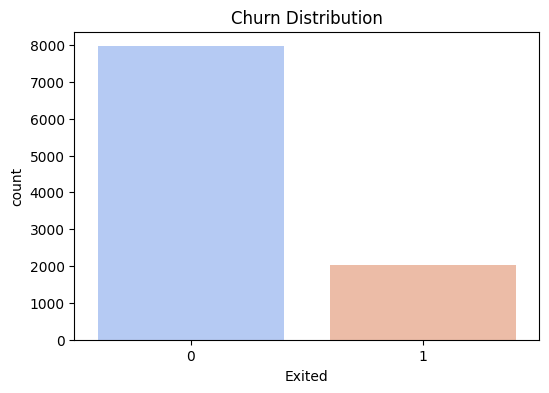

In [ ]:
# Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

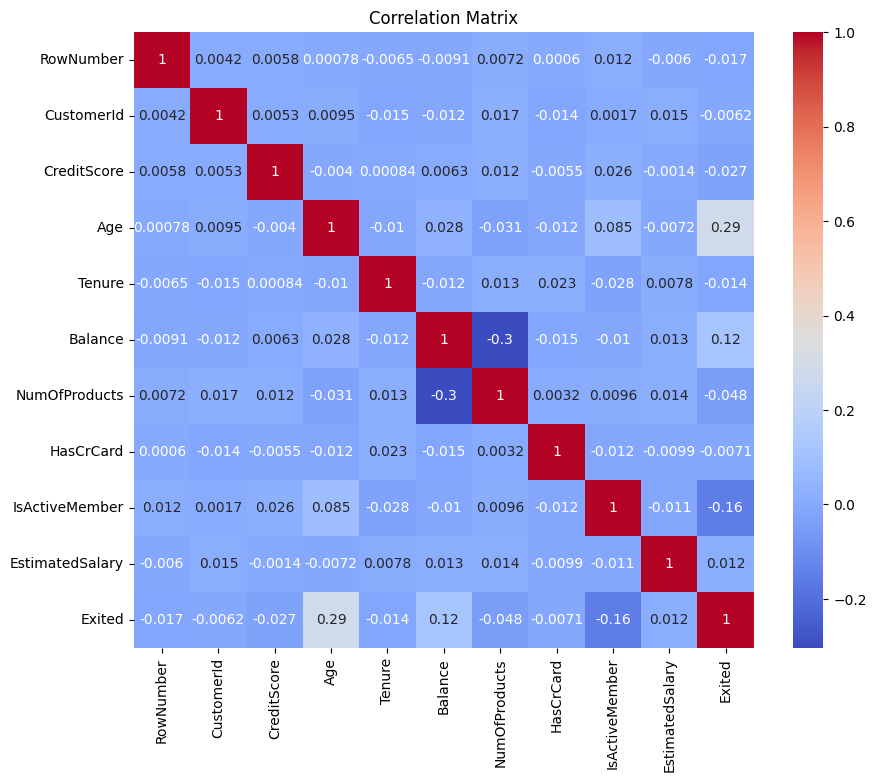

In [ ]:
# Check for outliers and correlations
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize or normalize numerical features
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()  # or MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

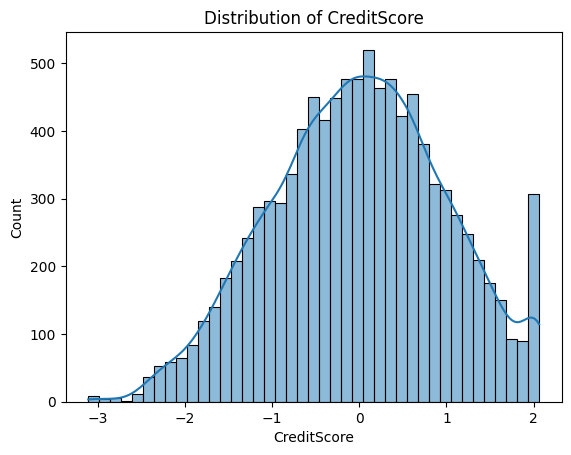

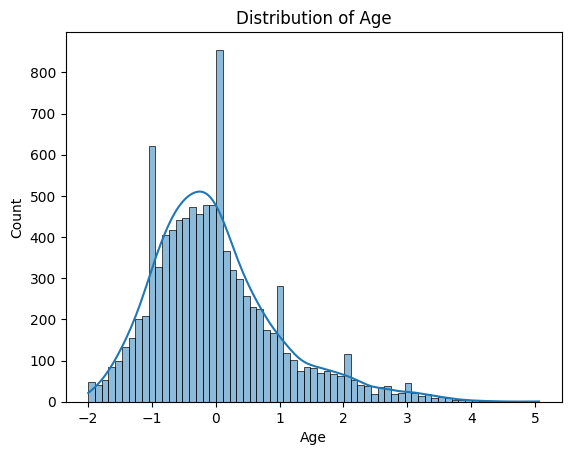

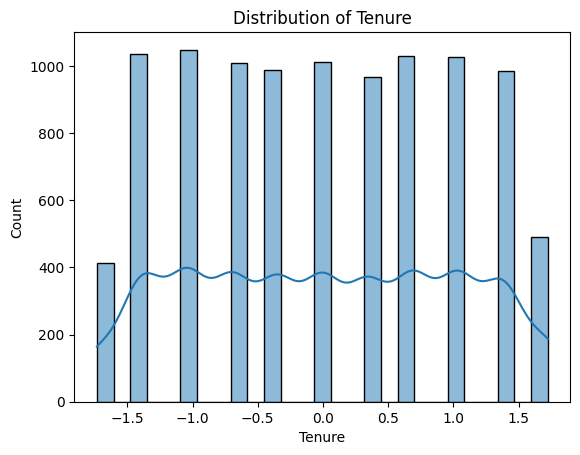

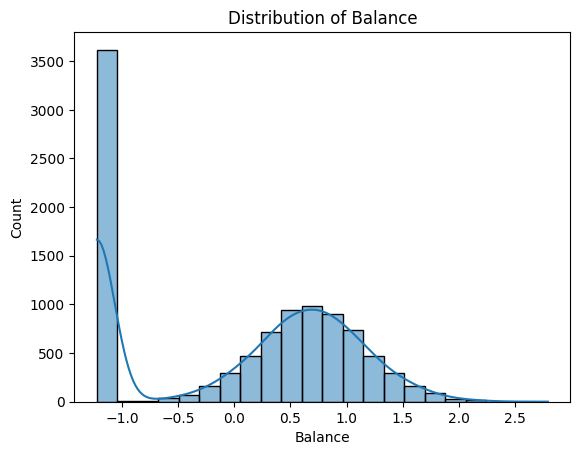

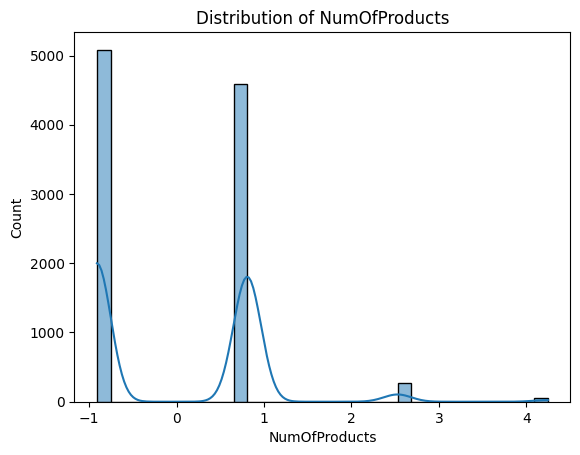

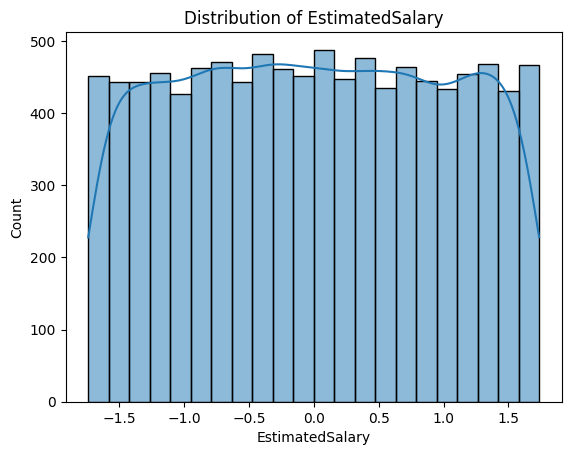

In [ ]:
# Plot distributions of numerical features
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

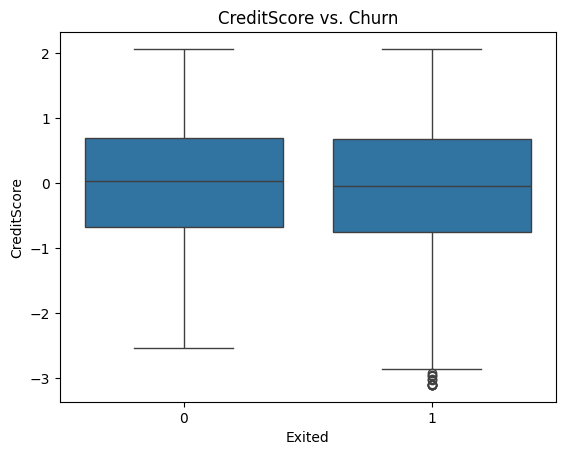

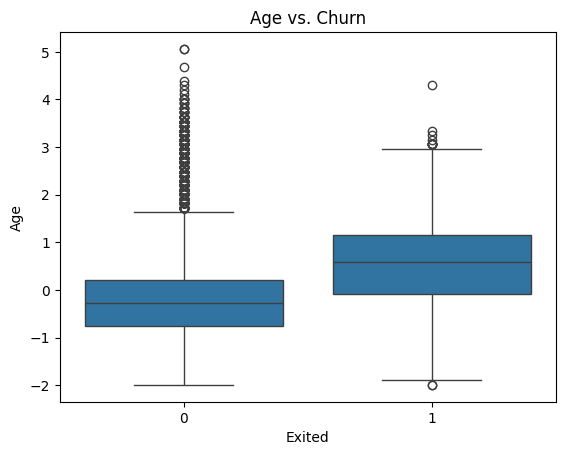

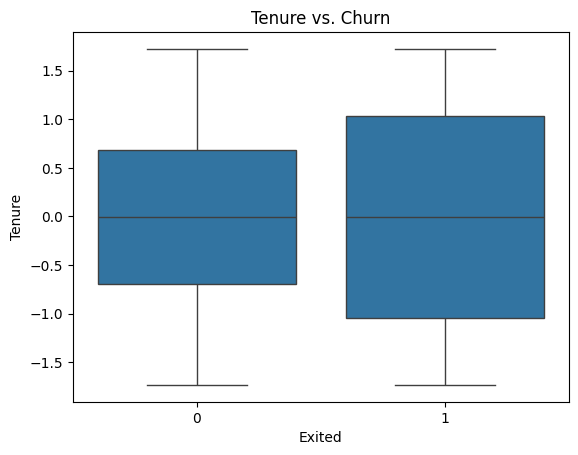

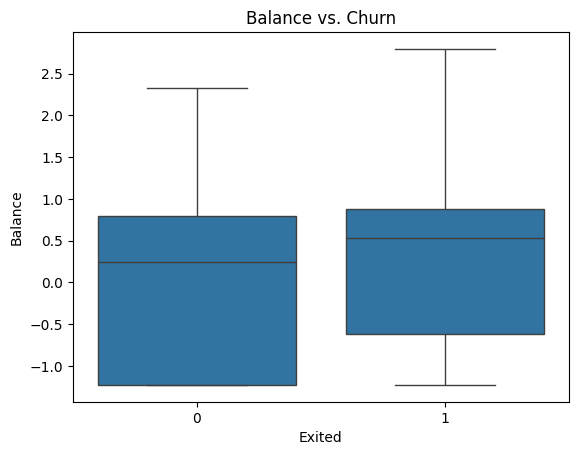

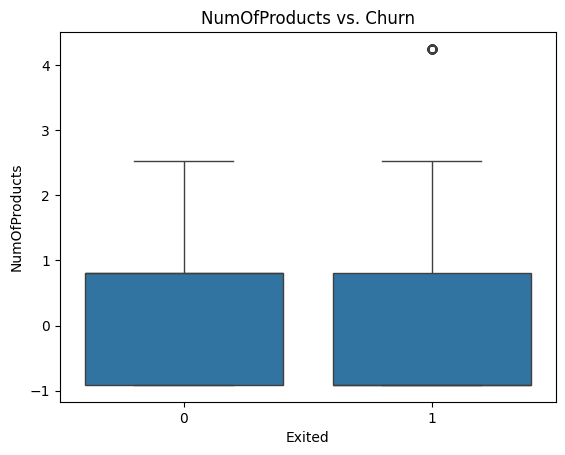

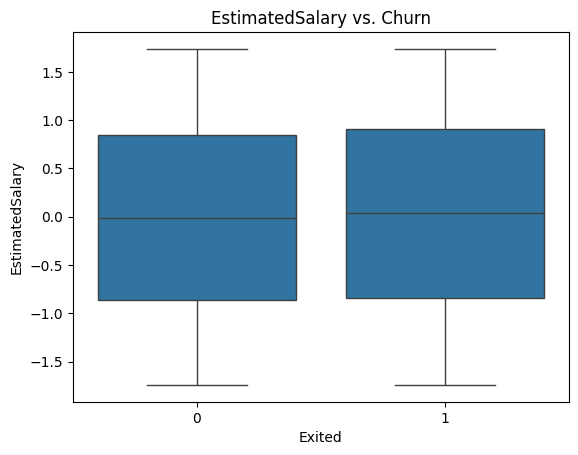

In [ ]:
# Create box plots for numerical features vs. churn
for col in numerical_cols:
    sns.boxplot(x='Exited', y=col, data=data)
    plt.title(f'{col} vs. Churn')
    plt.show()

<ipython-input-10-e2f3e62bf673>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=col, data=data, palette='Set2')


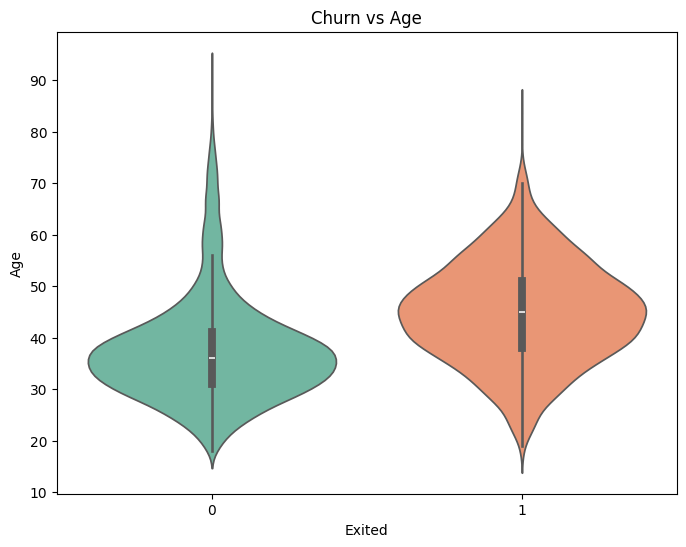

<ipython-input-10-e2f3e62bf673>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=col, data=data, palette='Set2')


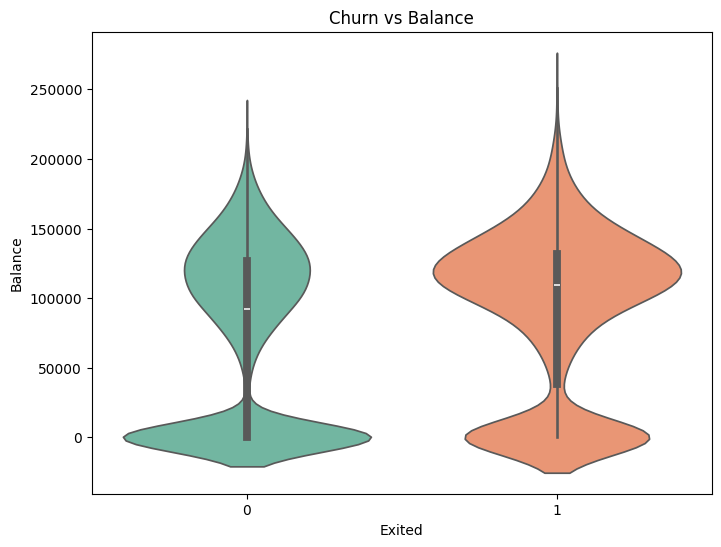

<ipython-input-10-e2f3e62bf673>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=col, data=data, palette='Set2')


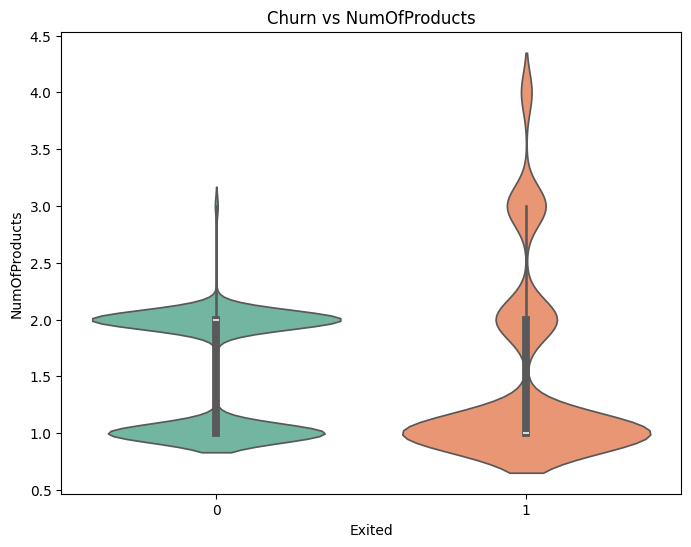

<ipython-input-10-e2f3e62bf673>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=col, data=data, palette='Set2')


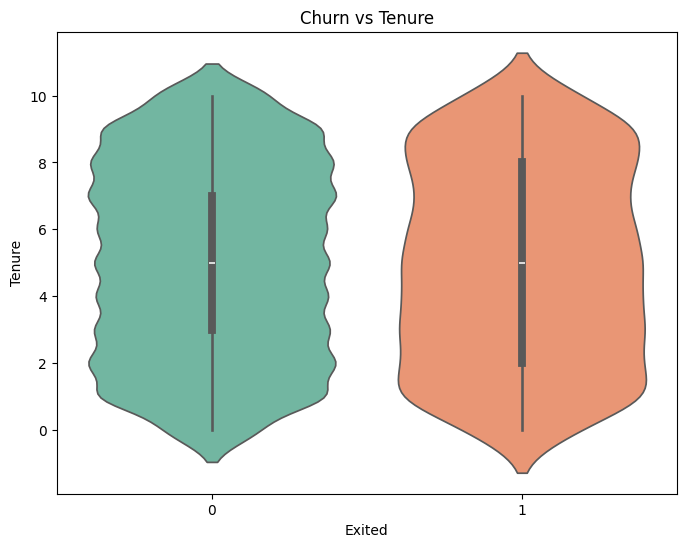

In [ ]:
# Visualize relationships between numerical features and churn
numerical_cols = ['Age', 'Balance', 'NumOfProducts', 'Tenure']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Exited', y=col, data=data, palette='Set2')
    plt.title(f"Churn vs {col}")
    plt.show()

In [ ]:
# One-hot encode categorical features using pandas get_dummies
categorical_cols = ['HasCrCard', 'Gender']
for col in categorical_cols:
    encoded_cols = pd.get_dummies(data[col], prefix=col, drop_first=True)  # Drop first category to avoid multicollinearity
    data = pd.concat([data, encoded_cols], axis=1)
    data.drop(col, axis=1, inplace=True)  # Remove original categorical column

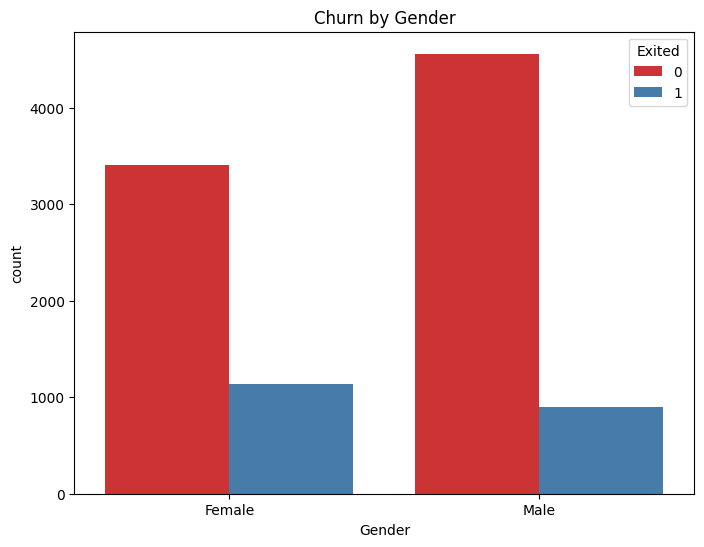

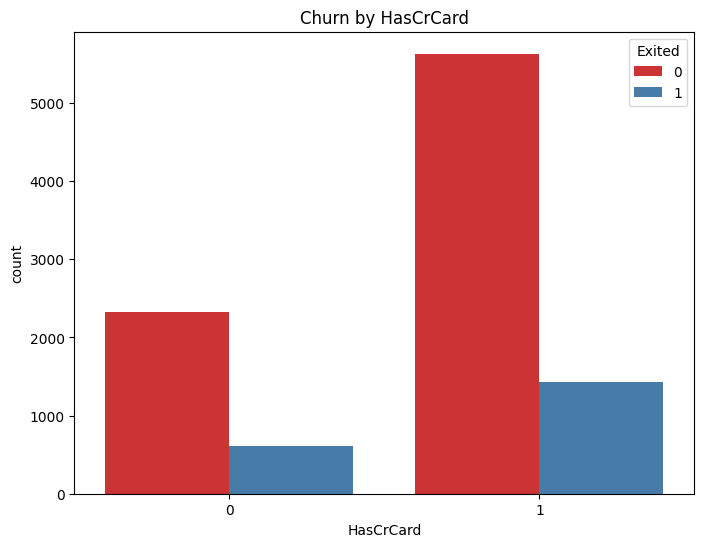

In [ ]:
# Explore categorical features related to credit card and churn
categorical_cols = ['Gender', 'HasCrCard']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Exited', data=data, palette='Set1')
    plt.title(f"Churn by {col}")
    plt.show()

In [ ]:
# Feature engineering: create additional features
# Assuming 'EstimatedSalary' and 'Tenure' are the column names in dataset
data['avg_transaction_value'] = data['EstimatedSalary'] / (data['Balance'] + 1)  # Avoid division by zero
data['is_long_term_customer'] = (data['Tenure'] > 12).astype(int) # Assuming tenure_months is Tenure

In [ ]:
# Drop irrelevant columns like customer_id if present
if 'customer_id' in data.columns:
    data.drop('customer_id', axis=1, inplace=True)

In [ ]:
# Split the data into features and target
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']              # Target variable

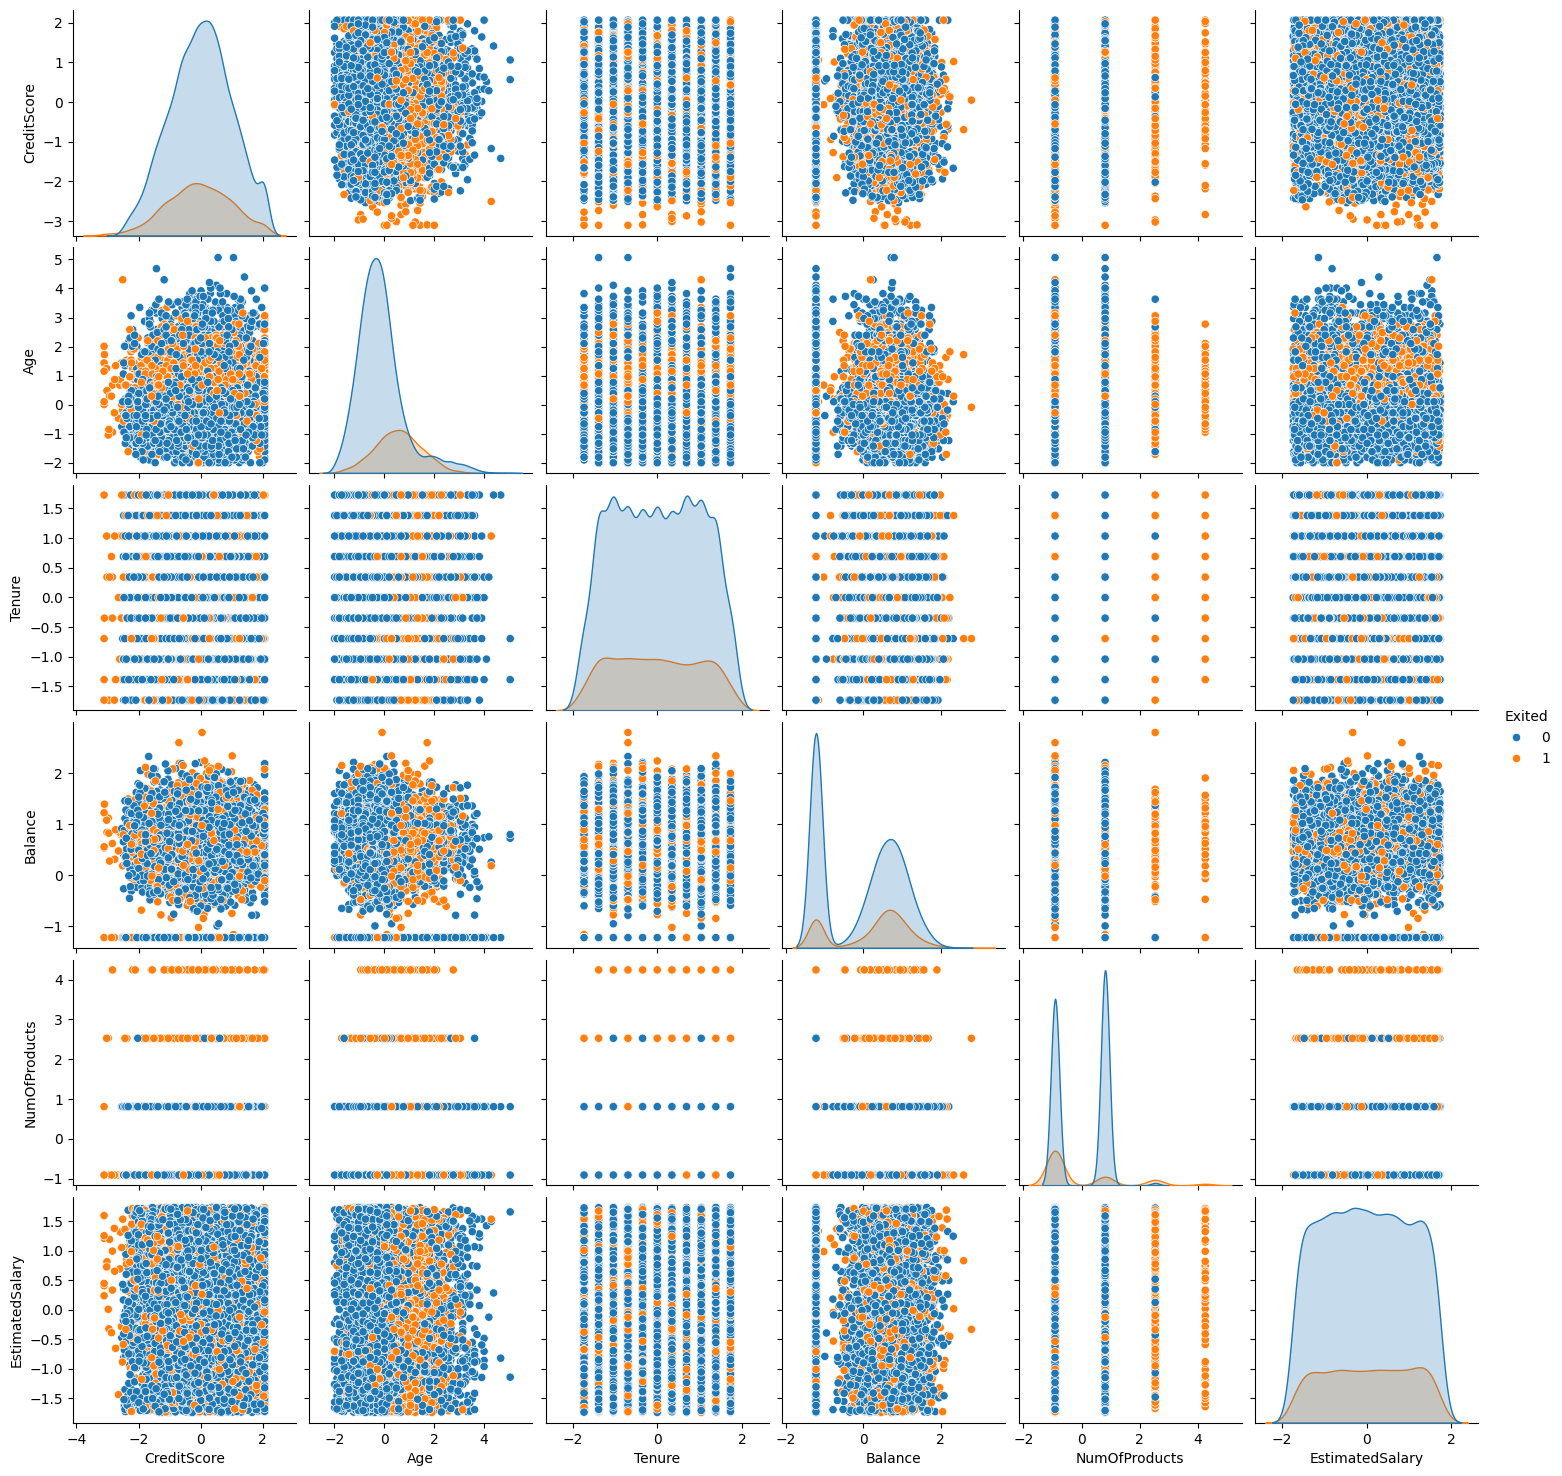

In [ ]:
# Create pair plots for numerical features
sns.pairplot(data[numerical_cols + ['Exited']], hue='Exited')
plt.show()

In [ ]:
# Define preprocessing pipelines for numerical and categorical features
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Combine the preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_cols + ['avg_transaction_value']),
    ('cat', cat_transformer, categorical_cols)
])

In [ ]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Iterate through the models, train them, and evaluate performance
best_model = None
best_model_name = None
best_accuracy = 0

In [ ]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)


Training Logistic Regression...

Training Random Forest...

Training Gradient Boosting...


In [ ]:
# Make predictions and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{name} Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.67      0.45      0.54       393

    accuracy                           0.85      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.84      0.85      0.84      2000



In [ ]:
# Track the best model
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = pipeline
    best_model_name = name

In [ ]:
print(f"\nBest Model: {best_model_name} with an accuracy of {best_accuracy:.2f}")


Best Model: Gradient Boosting with an accuracy of 0.85


In [ ]:
# Evaluate the best model with ROC-AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n{best_model_name} ROC-AUC Score: {roc_auc:.2f}")


Gradient Boosting ROC-AUC Score: 0.84


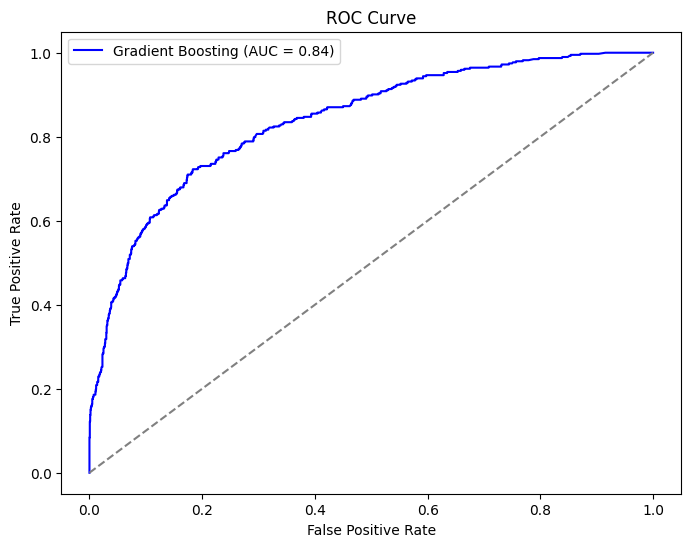

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
# Save the best model for deployment
joblib.dump(best_model, 'customer_churn_model.pkl')
print("\nBest model saved as 'customer_churn_model.pkl'.")


Best model saved as 'customer_churn_model.pkl'.


In [ ]:
# Example usage: Load the saved model and make predictions
loaded_model = joblib.load('customer_churn_model.pkl')

In [ ]:
# Example input data for prediction
example_data = pd.DataFrame({
    'Age': [35, 45, 29, 52, 41],  # Customer age
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],  # Customer gender
    'Balance': [800, 1500, 400, 0, 2300],  # Account balance
    'NumOfProducts': [1, 2, 1, 3, 2],  # Number of products purchased
    'Tenure': [18, 6, 24, 12, 8],  # Tenure in months
    'HasCrCard': [1, 0, 1, 0, 1],  # 1 if customer has a credit card, else 0
    'EstimatedSalary': [50000, 70000, 30000, 45000, 80000],  # Estimated salary
    'Churn': [0, 1, 0, 1, 0]  # Churn: 1 if the customer churned, 0 otherwise
})

# Add derived features
example_data['avg_transaction_value'] = example_data['EstimatedSalary'] / (example_data['Balance'] + 1)
example_data['is_long_term_customer'] = (example_data['Tenure'] > 12).astype(int)

print(example_data)

   Age  Gender  Balance  NumOfProducts  Tenure  HasCrCard  EstimatedSalary  \
0   35    Male      800              1      18          1            50000   
1   45  Female     1500              2       6          0            70000   
2   29  Female      400              1      24          1            30000   
3   52    Male        0              3      12          0            45000   
4   41    Male     2300              2       8          1            80000   

   Churn  avg_transaction_value  is_long_term_customer  
0      0              62.421973                      1  
1      1              46.635576                      0  
2      0              74.812968                      1  
3      1           45000.000000                      0  
4      0              34.767492                      0  


In [ ]:
predictions = loaded_model.predict(example_data)
example_data['prediction'] = ['Churn' if p == 1 else 'Not Churn' for p in predictions]
print(example_data[['Age', 'Gender', 'prediction']])

   Age  Gender prediction
0   35    Male  Not Churn
1   45  Female  Not Churn
2   29  Female  Not Churn
3   52    Male      Churn
4   41    Male  Not Churn


In [ ]:
df = pd.DataFrame(example_data)
df.to_csv("churn_dataset.csv", index=False)
print("Dataset saved as churn_dataset.csv")

Dataset saved as churn_dataset.csv


In [ ]:
!pip install gradio pandas numpy seaborn matplotlib scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.1/464.1 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.1
    Uninstalling huggingface-hub-0.27.1:
      Successfully uninstalled huggingface-hub-0.27.1


In [ ]:

%%writefile app.py
import gradio as gr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import joblib

# Function to preprocess the dataset
def preprocess_data(data, derived_features=True):
    if derived_features:
        if 'total_spent' in data.columns and 'total_transactions' in data.columns:
            data['avg_transaction_value'] = data['total_spent'] / (data['total_transactions'] + 1)
            data['is_long_term_customer'] = (data['tenure_months'] > 12).astype(int)
    if 'customer_id' in data.columns:
        data = data.drop('customer_id', axis=1)
    return data

# Function to train the model
def train_model(data, model_type):
    data = preprocess_data(data)
    if 'churn' not in data.columns:
        return "Error: Dataset must contain a 'churn' column.", None

    X = data.drop('churn', axis=1)
    y = data['churn']

    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, numerical_features),
            ('cat', cat_transformer, categorical_features)
        ]
    )

    if model_type == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    else:
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression(max_iter=1000)

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Model Evaluation
    classification = classification_report(y_test, y_pred, output_dict=True)
    classification_df = pd.DataFrame(classification).transpose()

    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    joblib.dump(pipeline, 'customer_churn_model.pkl')

    return (
        f"Model trained successfully! ROC-AUC: {roc_auc:.2f}",
        classification_df,
    )

# Function to predict churn for new data
def predict_churn(age, gender, total_spent, total_transactions, tenure_months, subscription_type):
    try:
        model = joblib.load('customer_churn_model.pkl')
    except FileNotFoundError:
        return "Error: No trained model found. Please train a model first."

    new_data = {
        'age': [age],
        'gender': [gender],
        'total_spent': [total_spent],
        'total_transactions': [total_transactions],
        'tenure_months': [tenure_months],
        'subscription_type': [subscription_type]
    }
    new_data_df = pd.DataFrame(new_data)
    new_data_df['avg_transaction_value'] = new_data_df['total_spent'] / (new_data_df['total_transactions'] + 1)
    new_data_df['is_long_term_customer'] = (new_data_df['tenure_months'] > 12).astype(int)

    prediction = model.predict(new_data_df)
    prediction_proba = model.predict_proba(new_data_df)[:, 1]

    return {
        "Prediction": "Churn" if prediction[0] == 1 else "Not Churn",
        "Churn Probability": round(prediction_proba[0], 2),
    }

# Gradio Interface for Training
def train_interface(file, model_type):
    if file is None:
        return "Please upload a CSV file.", None
    data = pd.read_csv(file.name)
    return train_model(data, model_type)

# Gradio Interface for Prediction
def prediction_interface(age, gender, total_spent, total_transactions, tenure_months, subscription_type):
    return predict_churn(age, gender, total_spent, total_transactions, tenure_months, subscription_type)

# Launch Gradio App
with gr.Blocks() as app:
    gr.Markdown("# Customer Churn Prediction App")

    with gr.Tab("Train Model"):
        with gr.Row():
            upload = gr.File(label="Upload Dataset (CSV)")
            model_type = gr.Dropdown(
                choices=["Random Forest", "Logistic Regression"],
                value="Random Forest",
                label="Select Model Type",
            )
        train_button = gr.Button("Train Model")
        train_output = gr.Text(label="Training Output")
        train_classification = gr.Dataframe(label="Classification Report")
        train_button.click(train_interface, inputs=[upload, model_type], outputs=[train_output, train_classification])

    with gr.Tab("Predict Churn"):
        age = gr.Number(label="Age", value=30)
        gender = gr.Radio(["Male", "Female"], label="Gender")
        total_spent = gr.Number(label="Total Spent", value=1000)
        total_transactions = gr.Number(label="Total Transactions", value=50)
        tenure_months = gr.Number(label="Tenure (Months)", value=12)
        subscription_type = gr.Radio(["Basic", "Premium"], label="Subscription Type")

        predict_button = gr.Button("Predict")
        prediction_output = gr.JSON(label="Prediction Result")
        predict_button.click(
            prediction_interface,
            inputs=[age, gender, total_spent, total_transactions, tenure_months, subscription_type],
            outputs=prediction_output,
        )

app.launch(share=True)

Writing app.py


In [ ]:
!python app.py

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://12e2cd1c4667348468.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/skle